# Projeto K Means Clustering


Os dados de cliente num shopping são um conjunto de dados interessante que contém dados hipotéticos de clientes. Suponha que tem um conjunto de dados de clientes e que quer dividi-los em vários grupos.

O DataSet "Mall_Customers.csv" contém os seguintes recursos:


1. ID - ID do cliente

2. Gender - Sexo do cliente

3. Age - Idade do cliente

4. Annual_Income_(k$) - Rendimento anual do cliente (em mil dólares)

5. Spending_Score - Pontuação de gastos do cliente (com base no comportamento do cliente e natureza dos gastos)

## Importar bibliotecas necessárias

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Importar o DataSet

In [32]:
df = pd.read_csv('Mall_Customers.csv')

## Listar o 5 primeiros registos do dataframe 

In [33]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Listar as informações do dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Efetuar um describe ao dataframe 

In [35]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Visualizar os dados

Construa um countplot com seaborn, para analisar a contagem por Sexo.

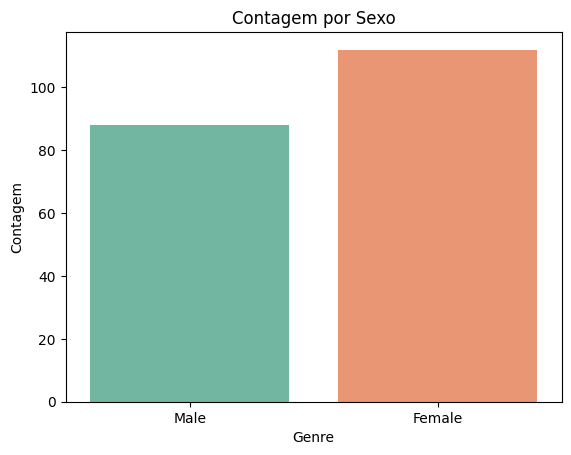

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Genre', hue='Genre', palette='Set2', legend=False)

plt.title('Contagem por Sexo')
plt.xlabel('Genre')
plt.ylabel('Contagem')
plt.show()

Construa um pairplot com seaborn

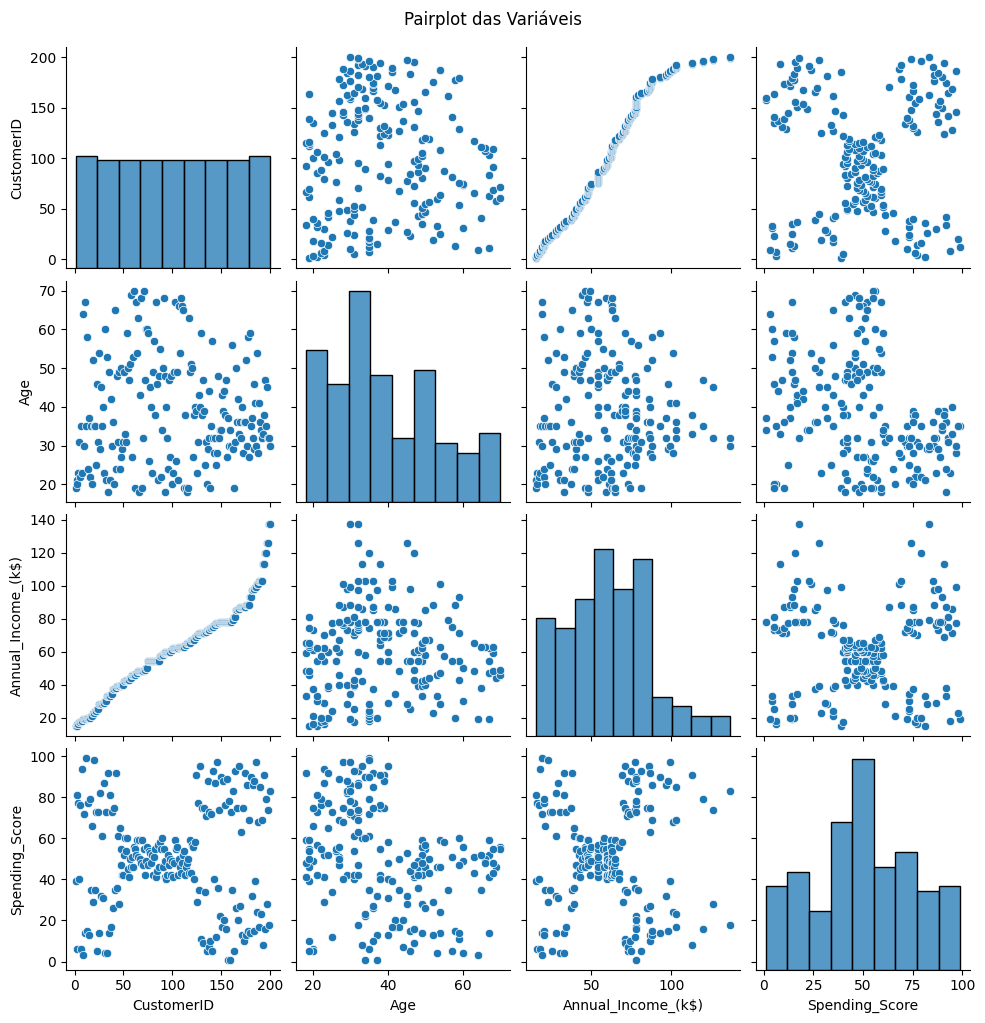

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

plt.suptitle('Pairplot das Variáveis', y=1.02)
plt.show()

Construa um scatter plot com Matplotlib, que relacione o "Annual_Income_(k$)" com o "Spending_Score"

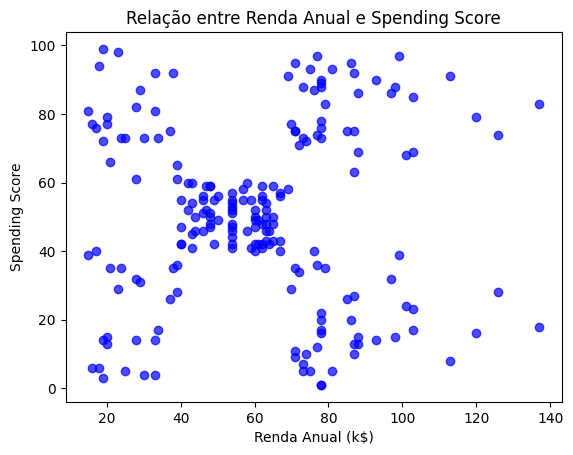

In [42]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], alpha=0.7, color='blue')

plt.title('Relação entre Renda Anual e Spending Score')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Spending Score')

plt.show()

# Verificar qual o número ótimo de clusters

Execute todos os passos necessários para calcular o número ótimo de clusters (método Elbow).

NOTA: Considere apenas os campos "Annual_Income_(k)" e "Spending_Score". Deverá criar um dataframe auxiliar apenas com estas colunas.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_aux = df[['Annual_Income_(k$)', 'Spending_Score']]

inertia = []

k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_aux)
    inertia.append(kmeans.inertia_)

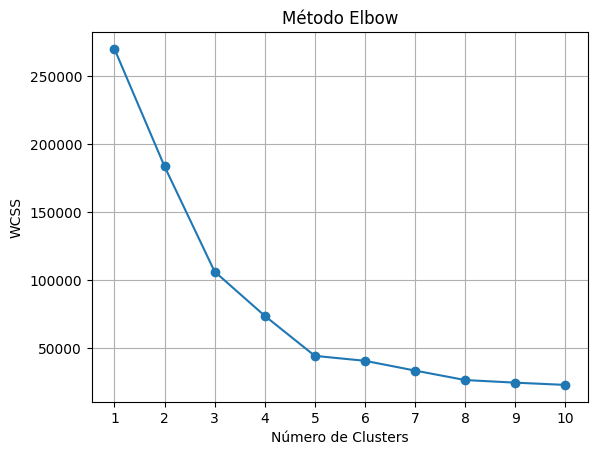

In [45]:
plt.plot(k_range, inertia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Construa o lineplot com seaborn, para verificar o número ótimo de clusters.

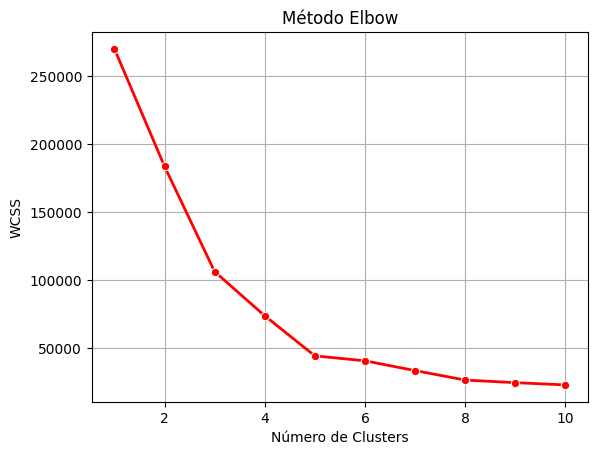

In [46]:
sns.lineplot(x=k_range, y=inertia, marker='o', color='red', linewidth=2)

plt.title('Método Elbow')

plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()

## Criar os clusters

Aplique o algoritmo KMeans com o número de clusters ideal e posteriormente execute o FIT (atribuindo-lhe como parâmetro o dataframe auxiliar que criou anteriormente).

In [48]:
from sklearn.cluster import KMeans

df_aux = df[['Annual_Income_(k$)', 'Spending_Score']].copy()

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=101)
kmeans.fit(df_aux)

df_aux.loc[:, 'Cluster'] = kmeans.labels_

print(df_aux.head())

   Annual_Income_(k$)  Spending_Score  Cluster
0                  15              39        4
1                  15              81        3
2                  16               6        4
3                  16              77        3
4                  17              40        4


Construa um scatter plot com Matplotlib, com os grupos criados pelo KMeans. Adicione também os centroides.

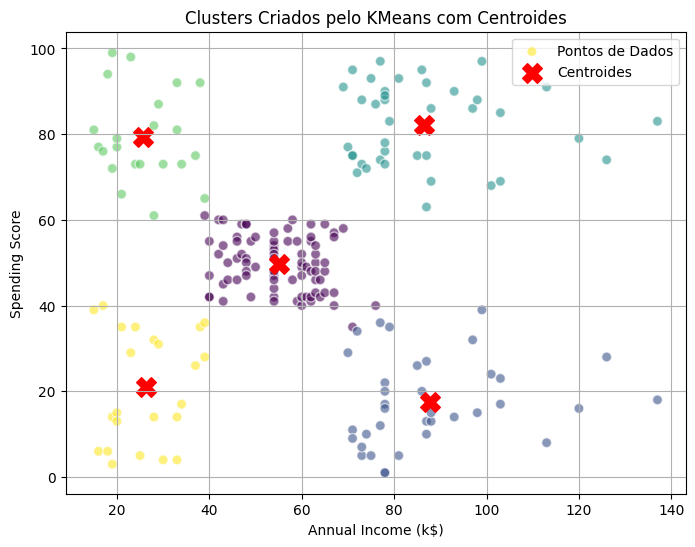

In [49]:
import matplotlib.pyplot as plt
import numpy as np

centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(df_aux['Annual_Income_(k$)'], df_aux['Spending_Score'], c=df_aux['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', label='Pontos de Dados')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Clusters Criados pelo KMeans com Centroides')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

plt.legend()

plt.grid(True)
plt.show()